# Llama4 (Scout) for bounding-box segmentation

In this notebook we will use the vision language model [Llama 4 Scout](https://huggingface.co/meta-llama/Llama-4-Scout-17B-16E) to test if it supports drawing bounding boxes around objects.

In [1]:
import openai
from skimage.io import imread
import stackview
from image_utilities import extract_json
from prompt_utilities import prompt_openai

import json
import os
import pandas as pd
from skimage.io import imsave


## Bounding box segmentation
We first load an example dataset, a crop of the human_mitosis image from scikit-image.

[[ 8  8  8 ... 10  9  9]
 [ 8  8  7 ... 10 11 10]
 [ 9  8  8 ...  9 10  9]
 ...
 [ 9  8  9 ...  9  9  8]
 [ 9  8  8 ...  9  9  9]
 [ 8  8  9 ... 10  9  9]]
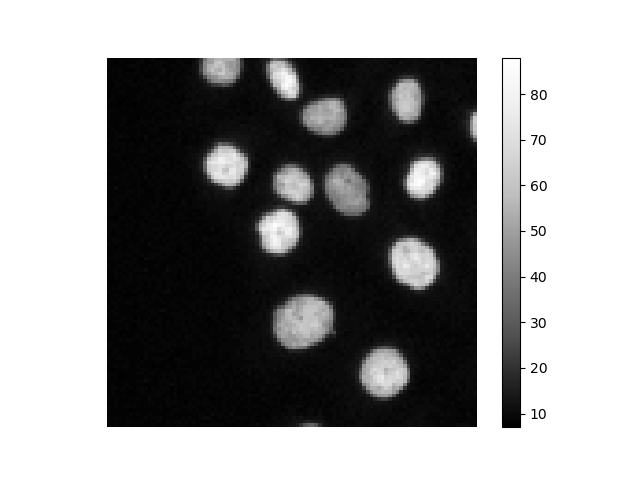
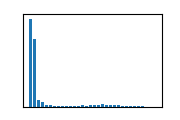

In [2]:
import stackview
from skimage import data
import numpy as np

# Load the human mitosis dataset
image = data.human_mitosis()[:100, :100]

stackview.insight(image)

In [3]:
model = "meta-llama/Llama-4-Scout-17B-16E-Instruct"

reply = prompt_openai("""
Give me a json object of bounding boxes around ALL bright blobs in this image. Assume the image width and height are 1. 
The bottom left is position (0,0), top left is (0,1), top right is (1,1) and bottom right is (1,0).
The format should be like this: 

```json
[
    {"x":float,"y":float, "width": float, "height": float},
    {"x":float,"y":float, "width": float, "height": float},
    ...
]
```

If you think you can't do this accuratly, please try anyway.
""", image, model=model, base_url="https://llm.scads.ai/v1", api_key=os.environ.get('SCADSAI_API_KEY'))
print(reply)

To solve this problem, I'll describe the steps I would take and then provide a JSON object with the bounding boxes. Since I can't directly process images, I'll rely on a hypothetical analysis of the provided image.

## Step 1: Image Analysis
The image appears to be a grayscale image with several bright blobs on a dark background. The blobs vary in size and are scattered across the image.

## 2: Preprocessing
In a real-world scenario, I would first apply preprocessing techniques to enhance the image quality and normalize it. However, given the simplicity required here, let's assume the image is already suitable for analysis.

## 3: Thresholding
To identify the bright blobs, I would apply a thresholding technique to convert the image into a binary format where pixels above a certain threshold value are considered part of the blobs, and those below are considered background.

## 4: Blob Detection
Using the binary image, I would then apply a blob detection algorithm. This could involve fin

In [4]:
bb = json.loads(extract_json(reply))

bb

[{'x': 0.243, 'y': 0.467, 'width': 0.086, 'height': 0.086},
 {'x': 0.413, 'y': 0.767, 'width': 0.086, 'height': 0.086},
 {'x': 0.413, 'y': 0.567, 'width': 0.086, 'height': 0.1},
 {'x': 0.572, 'y': 0.767, 'width': 0.114, 'height': 0.114},
 {'x': 0.587, 'y': 0.467, 'width': 0.086, 'height': 0.1},
 {'x': 0.729, 'y': 0.467, 'width': 0.114, 'height': 0.114},
 {'x': 0.758, 'y': 0.767, 'width': 0.114, 'height': 0.114},
 {'x': 0.758, 'y': 0.267, 'width': 0.086, 'height': 0.086},
 {'x': 0.901, 'y': 0.767, 'width': 0.086, 'height': 0.086},
 {'x': 0.901, 'y': 0.567, 'width': 0.086, 'height': 0.1},
 {'x': 0.901, 'y': 0.467, 'width': 0.114, 'height': 0.114},
 {'x': 0.901, 'y': 0.267, 'width': 0.114, 'height': 0.114},
 {'x': 0.614, 'y': 0.167, 'width': 0.086, 'height': 0.1},
 {'x': 0.495, 'y': 0.867, 'width': 0.086, 'height': 0.086},
 {'x': 0.374, 'y': 0.967, 'width': 0.086, 'height': 0.086}]

This correction step seems necessary because the model doesn't understand the coordinate system as we do.

In [5]:
for b in bb:
    b['t'] = b['x']
    b['x'] = b['y']
    b['y'] = 1 - b['t']
bb

[{'x': 0.467, 'y': 0.757, 'width': 0.086, 'height': 0.086, 't': 0.243},
 {'x': 0.767, 'y': 0.587, 'width': 0.086, 'height': 0.086, 't': 0.413},
 {'x': 0.567, 'y': 0.587, 'width': 0.086, 'height': 0.1, 't': 0.413},
 {'x': 0.767,
  'y': 0.42800000000000005,
  'width': 0.114,
  'height': 0.114,
  't': 0.572},
 {'x': 0.467,
  'y': 0.41300000000000003,
  'width': 0.086,
  'height': 0.1,
  't': 0.587},
 {'x': 0.467, 'y': 0.271, 'width': 0.114, 'height': 0.114, 't': 0.729},
 {'x': 0.767, 'y': 0.242, 'width': 0.114, 'height': 0.114, 't': 0.758},
 {'x': 0.267, 'y': 0.242, 'width': 0.086, 'height': 0.086, 't': 0.758},
 {'x': 0.767,
  'y': 0.09899999999999998,
  'width': 0.086,
  'height': 0.086,
  't': 0.901},
 {'x': 0.567,
  'y': 0.09899999999999998,
  'width': 0.086,
  'height': 0.1,
  't': 0.901},
 {'x': 0.467,
  'y': 0.09899999999999998,
  'width': 0.114,
  'height': 0.114,
  't': 0.901},
 {'x': 0.267,
  'y': 0.09899999999999998,
  'width': 0.114,
  'height': 0.114,
  't': 0.901},
 {'x': 0.1

[[[ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [ 9  9  9]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 3  3  3]
  [ 3  3  3]
  [ 0  0  0]
  ...
  [ 9  9  9]
  [12 12 12]
  [ 9  9  9]]

 [[ 6  6  6]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [ 6  6  6]
  [ 9  9  9]
  [ 6  6  6]]

 ...

 [[ 6  6  6]
  [ 3  3  3]
  [ 6  6  6]
  ...
  [ 6  6  6]
  [ 6  6  6]
  [ 3  3  3]]

 [[ 6  6  6]
  [ 3  3  3]
  [ 3  3  3]
  ...
  [ 6  6  6]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 3  3  3]
  [ 3  3  3]
  [ 6  6  6]
  ...
  [ 9  9  9]
  [ 6  6  6]
  [ 6  6  6]]]
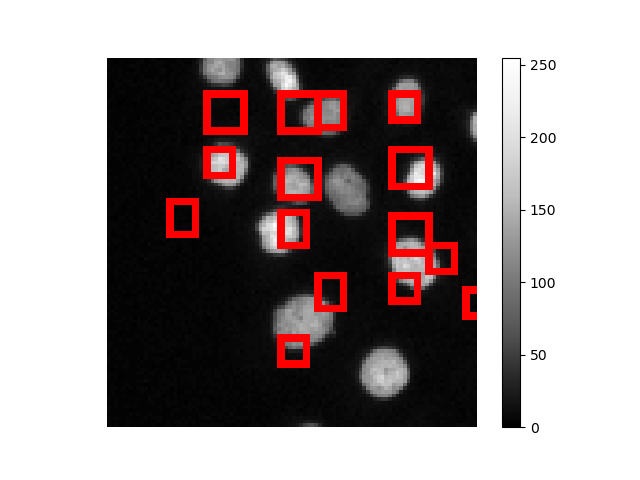
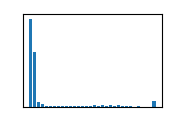

In [6]:
new_image = stackview.add_bounding_boxes(image, bb)

new_image